# Nice
first jupyter notebook shit

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix
import csv
import seaborn as sns

In [21]:
# Load the data from the CSV file
with open(r'./sources/insurance.csv', "r") as file:
    csvreader = csv.reader(file)
    header = next(csvreader)
    data = list(csvreader)

In [22]:
# Extract the data for each attribute
ages = [float(row[0]) for row in data]
bmis = [float(row[2]) for row in data]
children = [int(row[3]) for row in data]
charges = [float(row[6]) for row in data]

In [23]:
# Define a function to compute statistics for a list of values
def compute_statistics(values):
    max_value = max(values)
    min_value = min(values)
    q1 = np.percentile(values, 25)
    median = np.median(values)
    q3 = np.percentile(values, 75)
    std_dev = np.std(values)
    mean = np.mean(values)
    return max_value, min_value, q1, q3, median, std_dev, mean

In [24]:
# Compute statistics for each attribute
age_stats = compute_statistics(ages)
bmi_stats = compute_statistics(bmis)
children_stats = compute_statistics(children)
charges_stats = compute_statistics(charges)

In [25]:
# Print the statistics for each attribute
print("Age Statistics:")
print("Maximum:", age_stats[0])
print("Minimum:", age_stats[1])
print("First Quartile (Q1):", age_stats[2])
print("Third Quartile (Q3):", age_stats[3])
print("Median:", age_stats[4])
print("Standard Deviation:", age_stats[5])
print("Mean:", age_stats[6])

Age Statistics:
Maximum: 64.0
Minimum: 18.0
First Quartile (Q1): 27.0
Third Quartile (Q3): 51.0
Median: 39.0
Standard Deviation: 14.044709038954522
Mean: 39.20702541106129


In [26]:
# Create histograms for each attribute
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

Text(0, 0.5, 'Frequency')

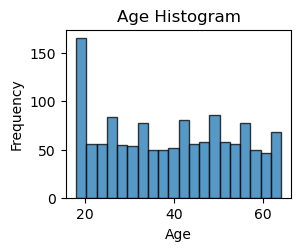

In [27]:
# Age Histogram
plt.subplot(221)
plt.hist(ages, bins=20, edgecolor='k', alpha=0.75)
plt.title('Age Histogram')
plt.xlabel('Age')
plt.ylabel('Frequency')